In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [ ]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=True)
X = data[:, :3]
y = data[:, 3:4]
data_size = len(X)

X_train = np.hstack((np.ones((data_size, 1)), X))

In [ ]:
# forward
def predict(X, theta):
    pred = X.T @ theta
    return pred

# compute gradient
def gradient(X, y, y_predict):
    dtheta = X @ (y_predict - y)
    return dtheta

# update weights
def update_weight(theta, dtheta, learing_rate):
    theta_new = theta - learing_rate * dtheta
    return theta_new

# compute loss
def compute_loss(y, y_predict):
    loss = (y_predict - y) ** 2
    return loss

In [ ]:
losses = []
learning_rate = 1e-6
num_of_epochs = 10
batch_size = 8
theta = np.random.random((X_train.shape[1], 1))

for epoch in range(num_of_epochs): # Train n epochs
    for i in range(0, data_size, batch_size): # Train with m sample
        # get m sample
        xm = X_train[i:i+batch_size].reshape(-1, batch_size)
        ym = y[i:i+batch_size]
        
        # predict
        ym_predict = predict(xm, theta)
        
        # compute loss
        loss = compute_loss(ym, ym_predict)
        losses.append(loss.mean())

        # compute gradient
        dtheta = gradient(xm, ym, ym_predict)

        # update weights
        theta = update_weight(theta, dtheta, learning_rate)

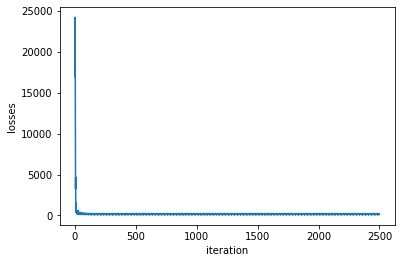

In [ ]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()